In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
n_samples = 1000

In [4]:
x = np.zeros(n_samples)

In [5]:
x[1] = 1
c = np.cos(2*np.pi*0.005)

In [6]:
for i in range(2,n_samples):
    x[i]= 2*c*x[i-1] - x[i-2]

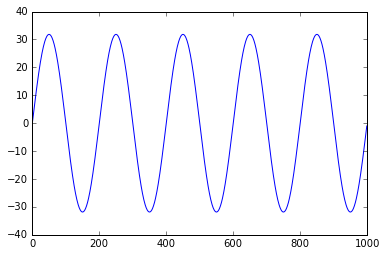

In [7]:
plt.plot(x)

In [8]:
X = np.array([[x[i-1],x[i-2]] for i in range(2,1000)])
Y = np.array([x[i] for i in range(2,1000)])

### Coefficients to find 

In [9]:
coeffs_true = np.array([2*c, -1]).reshape(-1,1)

In [10]:
coeffs_true

array([[ 1.99901312],
       [-1.        ]])

### Finding coefficients with Tensorflow

In [11]:
import tensorflow as tf

In [12]:
X_tf = tf.placeholder(dtype=tf.float32, shape=[None,2], name="X_tf")
Y_tf = tf.placeholder(dtype=tf.float32, shape=[None,1], name="Y_tf")

In [13]:
c_tf = tf.Variable(tf.random_normal([2,1], stddev=1.0, dtype=tf.float32))
# c_tf = tf.Variable(initial_value=coeffs_true)

In [14]:
loss = tf.reduce_sum(
    tf.square(
        tf.subtract(
            tf.matmul(X_tf,c_tf), Y_tf
        )
    )
)

In [15]:
train_op = tf.train.AdamOptimizer(learning_rate=0.01, epsilon=1E-12).minimize(loss)

### Init Session

In [18]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [19]:
loss_list = []

In [20]:
sess.run(c_tf, feed_dict={X_tf:X, Y_tf:Y.reshape(-1,1)})

array([[ 1.67598951],
       [-1.56020331]], dtype=float32)

In [21]:
for i in range(10000):
    sess.run(train_op, feed_dict={X_tf:X, Y_tf:Y.reshape(-1,1)})
    loss_val = sess.run(loss, feed_dict={X_tf:X, Y_tf:Y.reshape(-1,1)})
    loss_list.append(loss_val)

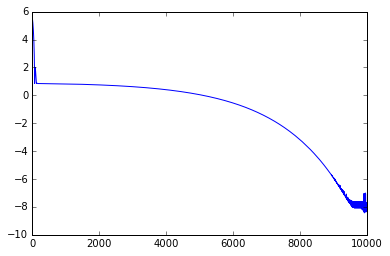

In [22]:
plt.plot(np.log10(loss_list))

In [293]:
sess.run(c_tf, feed_dict={X_tf:X, Y_tf:Y.reshape(-1,1)})

array([[ 1.99580693],
       [-0.99679369]], dtype=float32)

In [23]:
coeffs_true

array([[ 1.99901312],
       [-1.        ]])

### Comments

The obtained value is close to the target value ! Mission accomplished.